![Usa Jesus.PNG](https://i.ibb.co/nf4Fd4q/Usa-Jesus.png)

#**Regresión Logística**

La regresión logística resulta útil para los casos en los que se desea predecir la presencia o ausencia de una característica o resultado según los valores de un conjunto de predictores. Es similar a un modelo de regresión lineal, pero está adaptado para modelos en los que la variable dependiente es dicotómica. Los coeficientes de regresión logística pueden utilizarse para estimar la razón de probabilidad de cada variable independiente del modelo. La regresión logística se puede aplicar a un rango más amplio de situaciones de investigación que el análisis discriminante.

**Ejemplo**. ¿Qué características del estilo de vida son factores de riesgo de enfermedad cardiovascular? Dada una muestra de pacientes a los que se mide la situación de fumador, dieta, ejercicio, consumo de alcohol, y estado de enfermedad cardiovascular, se puede generar un modelo utilizando las cuatro variables de estilo de vida para predecir la presencia o ausencia de enfermedad cardiovascular en una muestra de pacientes. El modelo puede utilizarse posteriormente para derivar estimaciones de la razón de probabilidad para cada uno de los factores y así indicarle, por ejemplo, cuánto más probable es que los fumadores desarrollen una enfermedad cardiovascular frente a los no fumadores.

Fuente: 
[*IBM - SPSS Statistics*](https://www.ibm.com/docs/es/spss-statistics/SaaS?topic=regression-logistic)

###**Scikit-Learn**

*Scikit-Learn* es una de estas librerías gratuitas para Python. Cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías de Python como NumPy, SciPy, Seaborn y matplotlib.

La gran variedad de algoritmos y utilidades de Scikit-learn la convierten en la herramienta básica para empezar a programar y estructurar los sistemas de análisis datos y modelado estadístico. Los algoritmos de Scikit-Learn se combinan y depuran con otras estructuras de datos y aplicaciones externas como Pandas o PyBrain.

*Modelo de regresión logistica Scikit-Learn:*
[enlace](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)



##**1. Importe de librerias:** Pandas, Numpy, Seaborn, Matplotlib

*- Adicional se importal el modelo de regresion logistica por **sklearn**.*

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##**2. Cargue del data set:** 
Realizamos el importe de nuestro data set [*Pima Indians Diabetes Database*](https://raw.githubusercontent.com/jchaves1406/Machine-Learning/424cdd5675dc18281954ec6827a3f26bb56db897/Modelos%20Machine%20Learning/diabetes.csv) . Construiremos un modelo que intente predecir si un paciente puede llegar a sufrir de diabetes o no. En nuestro data set la variable *Outcome* corresponderá a nuestras variables independientes (***Target***) la cual representa nuestro dato categórico de manera binaria 1 para pacientes que padecen diabetes y 0 para pacientes que no padecen diabetes. Por otro lado, las demás variables serán nuestras variables dependientes (***Features***).


In [94]:
dfDiabetes = pd.read_csv('diabetes.csv')

# Motrar las primeras 5 posiciones de nuestro dataFrame
dfDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
#Se requiere conocer el nombre de cada una de las variables
dfDiabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##**2.1 Descripción de variables:** 
1. Pregnancies: Número de embarazos.
2. Glucose: Nivel de glucosa en la sangre.
3. BloodPressure: Presión sanguinea.
4. SkinThickness: Grosor de piel.
5. Insulin: Nivel de insulina en la sangre.
6. BMI: Índice de masa corporal (Body Mass Index).
7. DiabetesPedigreeFunction: Indica que individuos comparten un rasgo o condición genética en particular.
8. Age: Edad de la persona.
9. Outcome: Valor binario, tiene o no diabetes.



##**2.2 EDA (Exploratory Data Analisys) exploracion basica de datos**


El método **DataFrame.describe()** genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN. Este método nos dice muchas cosas sobre un conjunto de datos. Una cosa importante es que el método describe () trata solo con valores numéricos. No funciona con valores categóricos. Entonces, si hay valores categóricos en una columna, el método describe () lo ignorará y mostrará un resumen para las otras columnas a menos que se pase el parámetro include = "all".

Ahora, entendamos las estadísticas que se generan con el método describe ():
* count nos dice el número de filas vacías NoN en una característica.
* mean nos dice el valor medio de esa característica.
* std nos dice el valor de desviación estándar de esa característica.
* min nos dice el valor mínimo de esa característica.
* 25%, 50% y 75% son el percentil / cuartil de cada característica. Esta información de cuartiles nos ayuda a detectar valores atípicos.
* max nos dice el valor máximo de esa característica.

Fuente: [pandas docs(DataFrame.describe)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

In [96]:
dfDiabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##**2.4 Información del dataFrame:** Tipos de datos

Para saber qué tipo de datos tiene nuestro dataFrame usaremos el método ***.info()*** el cual mostrara el tipo de dato de cada una de nuestras variables. Proporciona información sobre los tipos de datos, columnas, recuentos de valores nulos, uso de memoria, etc.

Fuente: [pandas docs(DataFrame.info)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)


In [97]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##**2.5 Valores nulos**
¿Puede el valor mínimo de las columnas enumeradas a continuación ser cero (0)?

* En estas columnas, un valor de cero no tiene sentido y, por lo tanto, indica un valor faltante. Las siguientes columnas o variables tienen un valor cero no válido:
  1. Glucosa
  2. Presión sanguínea
  3. SkinThickness
  4. Insulina
  5. IMC

* Es mejor reemplazar ceros con NaN, ya que luego contarlos sería más fácil y los ceros deben reemplazarse con valores adecuados.

In [98]:
# Reemplazando (0) con NaN (valores nulos)
dfDiabetesCopy = dfDiabetes.copy(deep = True)
dfDiabetesCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfDiabetesCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Mostrar el conteo de valores nulos
print(dfDiabetesCopy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [99]:
# Observando la forma de los datos (cantidad)
# Shape(filas, columnas)
dfDiabetes.shape

(768, 9)

* Para completar estos valores de Nan, es necesario comprender la distribución de datos, para esto, utilizaremos graficas de barras para asi tener una mejor comprension general de nuestro dataFrame.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d56686d50>,
      dtype=object)

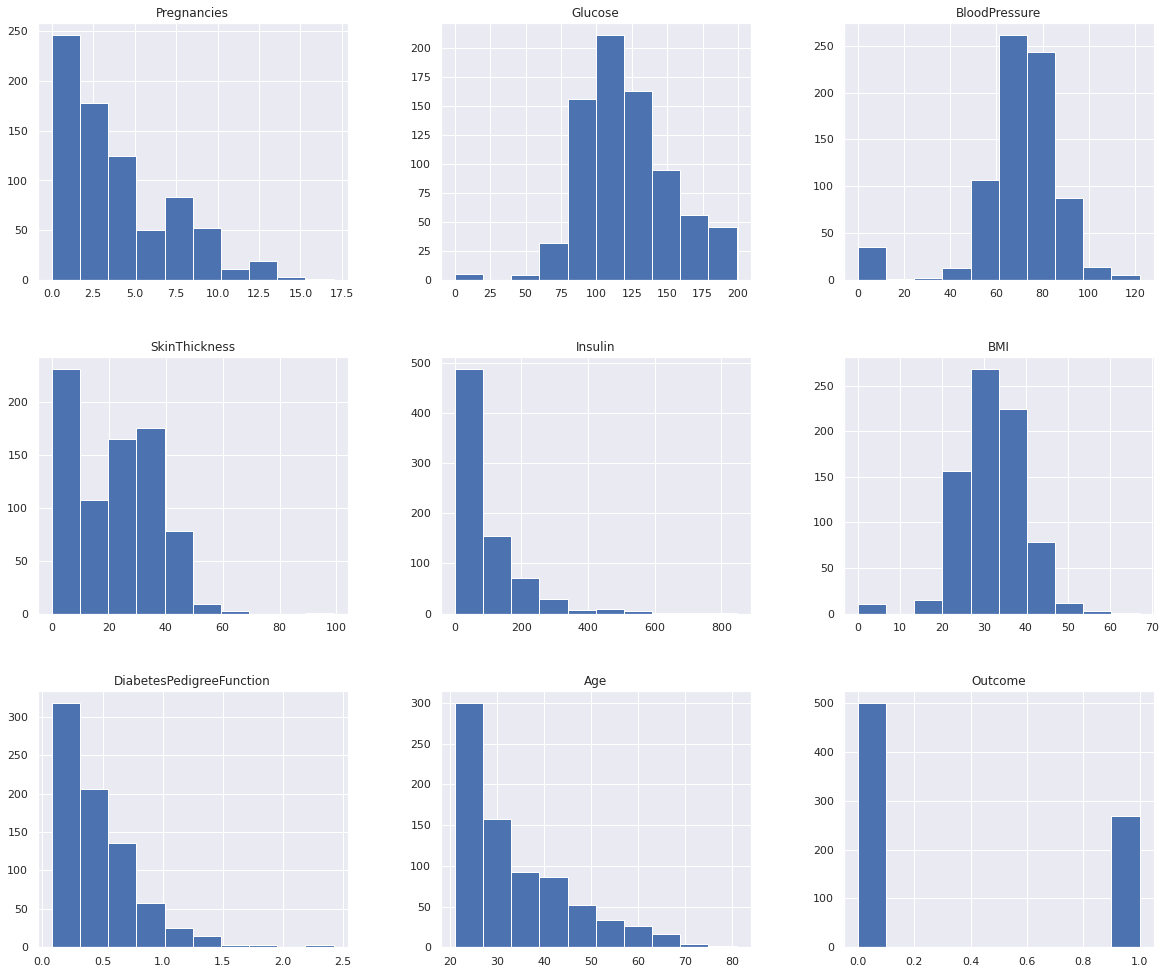

In [100]:
dfDiabetes.hist(figsize = (20,17))

* Con el objetivo de imputar valores a NaN para las columnas de acuerdo con la media de su distribución tenemos:

In [101]:
dfDiabetesCopy['Glucose'].fillna(dfDiabetesCopy['Glucose'].mean(), inplace = True)
dfDiabetesCopy['BloodPressure'].fillna(dfDiabetesCopy['BloodPressure'].mean(), inplace = True)
dfDiabetesCopy['SkinThickness'].fillna(dfDiabetesCopy['SkinThickness'].median(), inplace = True)
dfDiabetesCopy['Insulin'].fillna(dfDiabetesCopy['Insulin'].median(), inplace = True)
dfDiabetesCopy['BMI'].fillna(dfDiabetesCopy['BMI'].median(), inplace = True)

* Trazado después de la eliminación de los valores nulos:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d5636d450>,
      dtype=object)

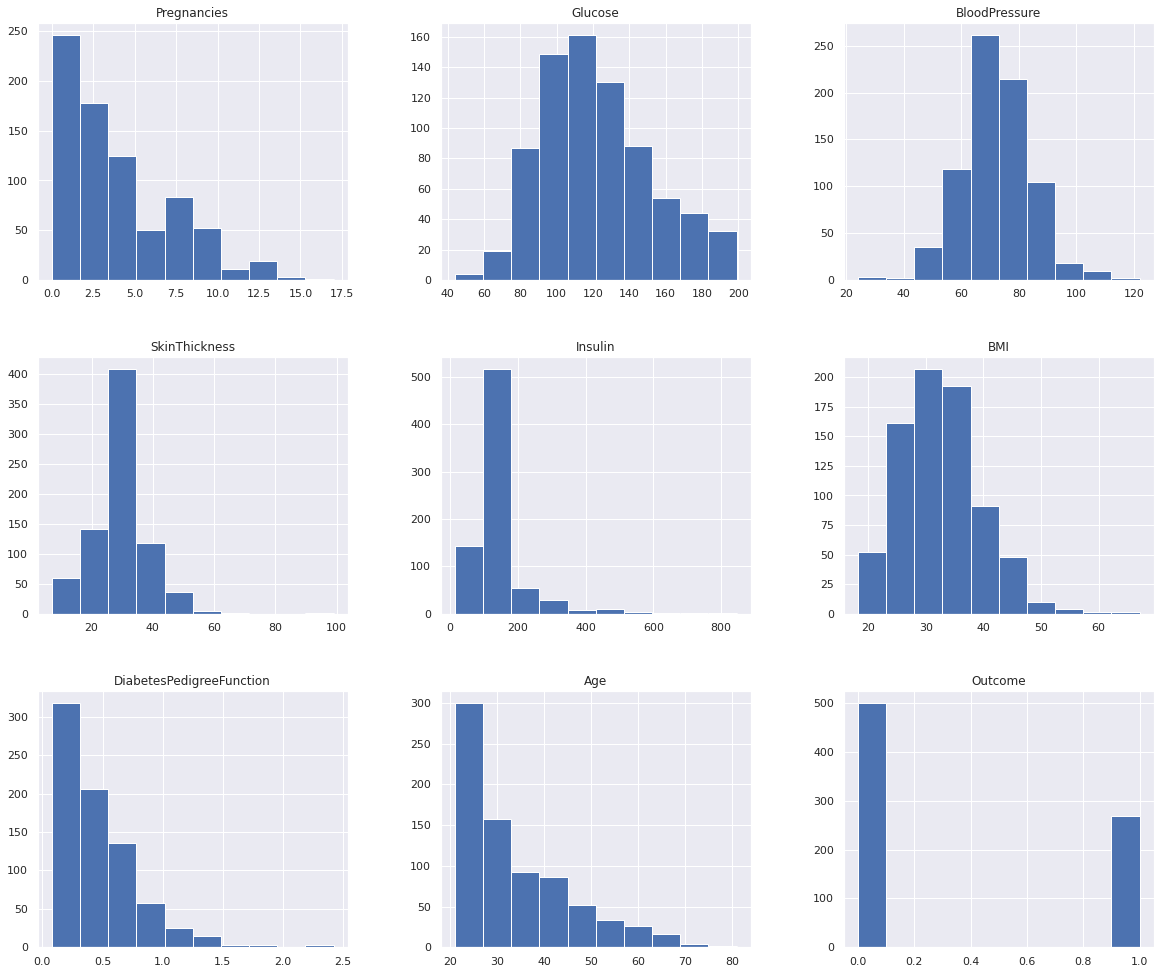

In [102]:
dfDiabetesCopy.hist(figsize = (20,17))

* En las graficas anteriores pudimos visualizar de manera muy general el conteo de nuestras variables y respectiva distribucion

##**2.5 Distribución de variables**

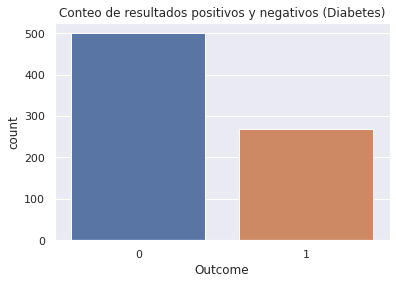

In [103]:
# Comprobar el equilibrio de los datos trazando el recuento de resultados por su valor
sns.countplot(x='Outcome', data=dfDiabetesCopy)
plt.title('Conteo de resultados positivos y negativos (Diabetes)')
plt.show()


* El gráfico anterior muestra en mayor porporcion la cantidad de datos que tienen un valor de resultado 0, lo que significa que la diabetes no estaba presente, ademas, el número de no diabéticos es casi el doble del número de pacientes diabéticos.

##**2.6 Visualización:** Matriz de dispersión par por variable

El diagrama de pares se basa en dos figuras básicas, el histograma y el diagrama de dispersión. El histograma en la diagonal nos permite ver la distribución de una sola variable, mientras que los diagramas de dispersión en los triángulos superior e inferior muestran la relación (o falta de ella) entre dos variables.

Referencia: [towardsdatascience.com](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d56d8d650>,
      dtype=object)

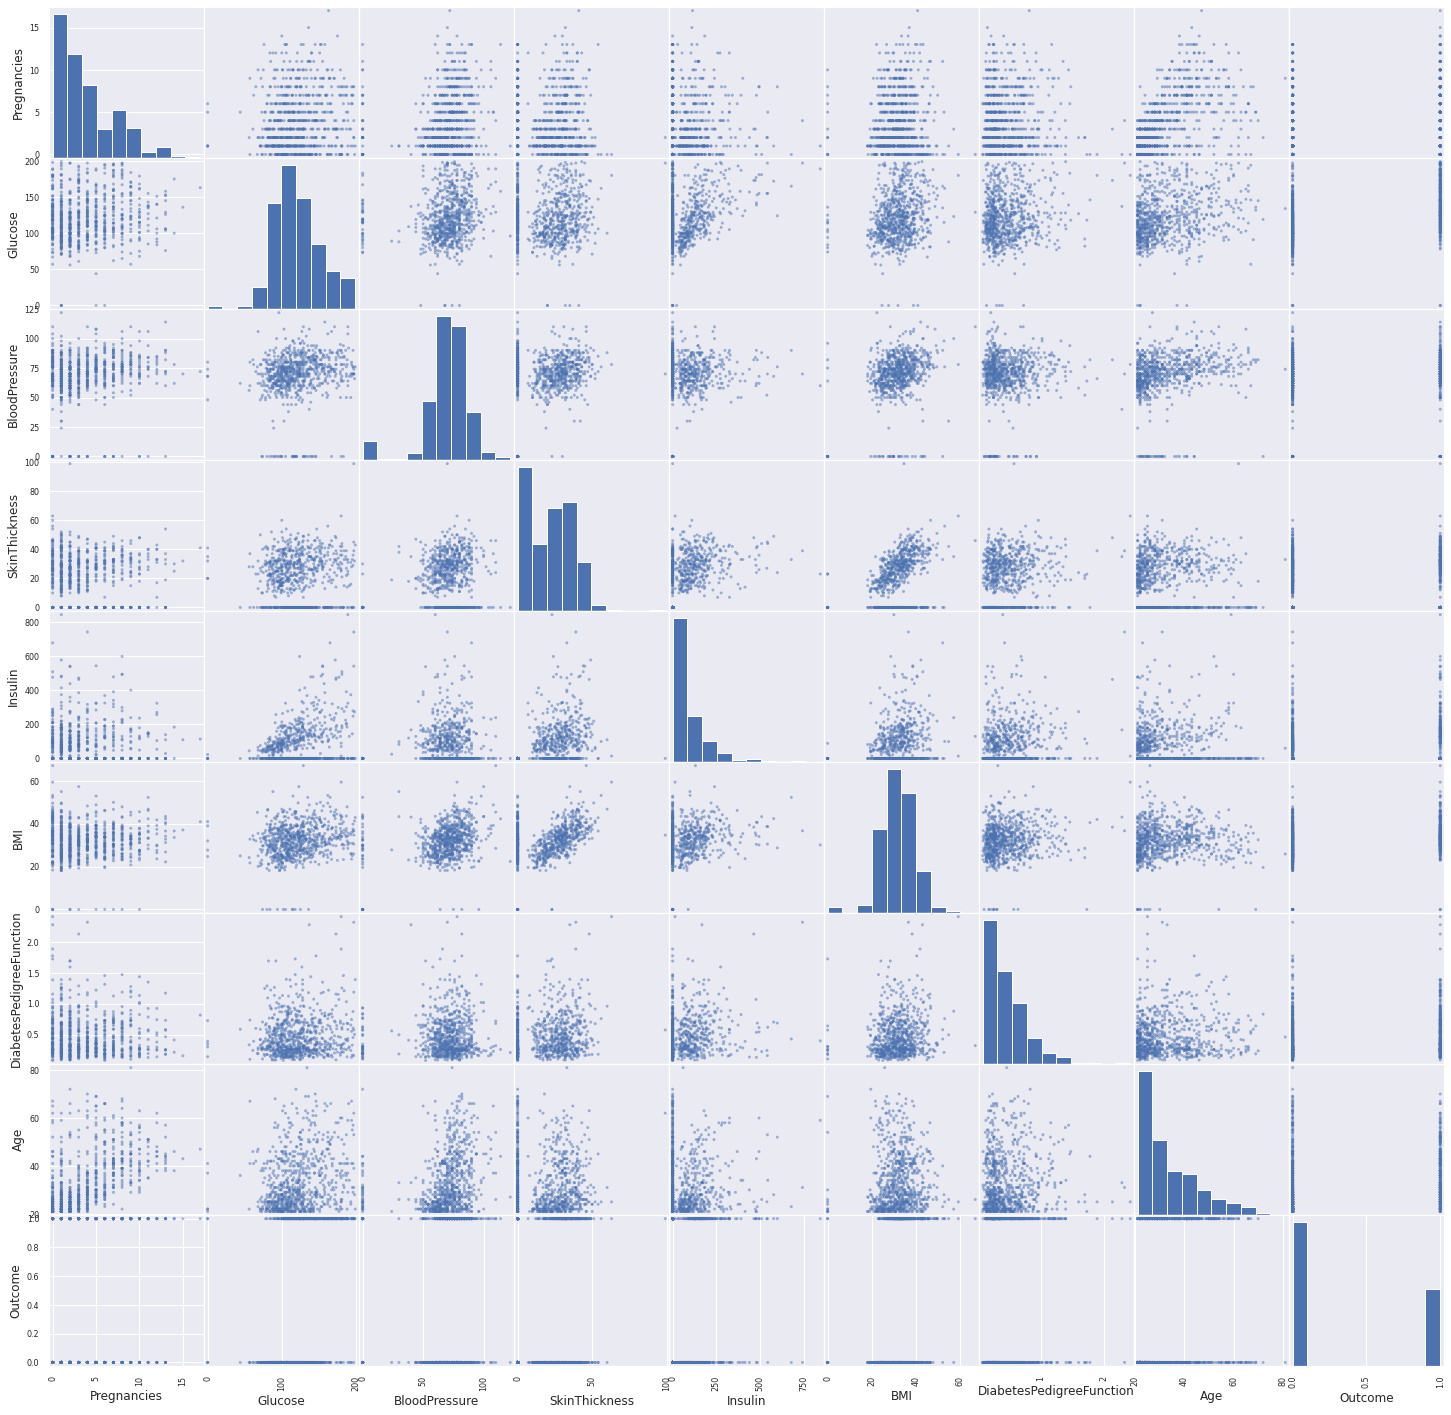

In [104]:
pd.plotting.scatter_matrix(dfDiabetes,figsize=(25, 25))


##**2.7 Visualizacion:** Por por variable (Correlacion por coeficiente de Pearson's)

**Coeficiente de correlación de Pearson**: le ayuda a averiguar la relación entre dos cantidades. Le da la medida de la fuerza de asociación entre dos variables. El valor del coeficiente de correlación de Pearson puede estar entre -1 y +1. 1 significa que están altamente correlacionados y 0 significa que no hay correlación.

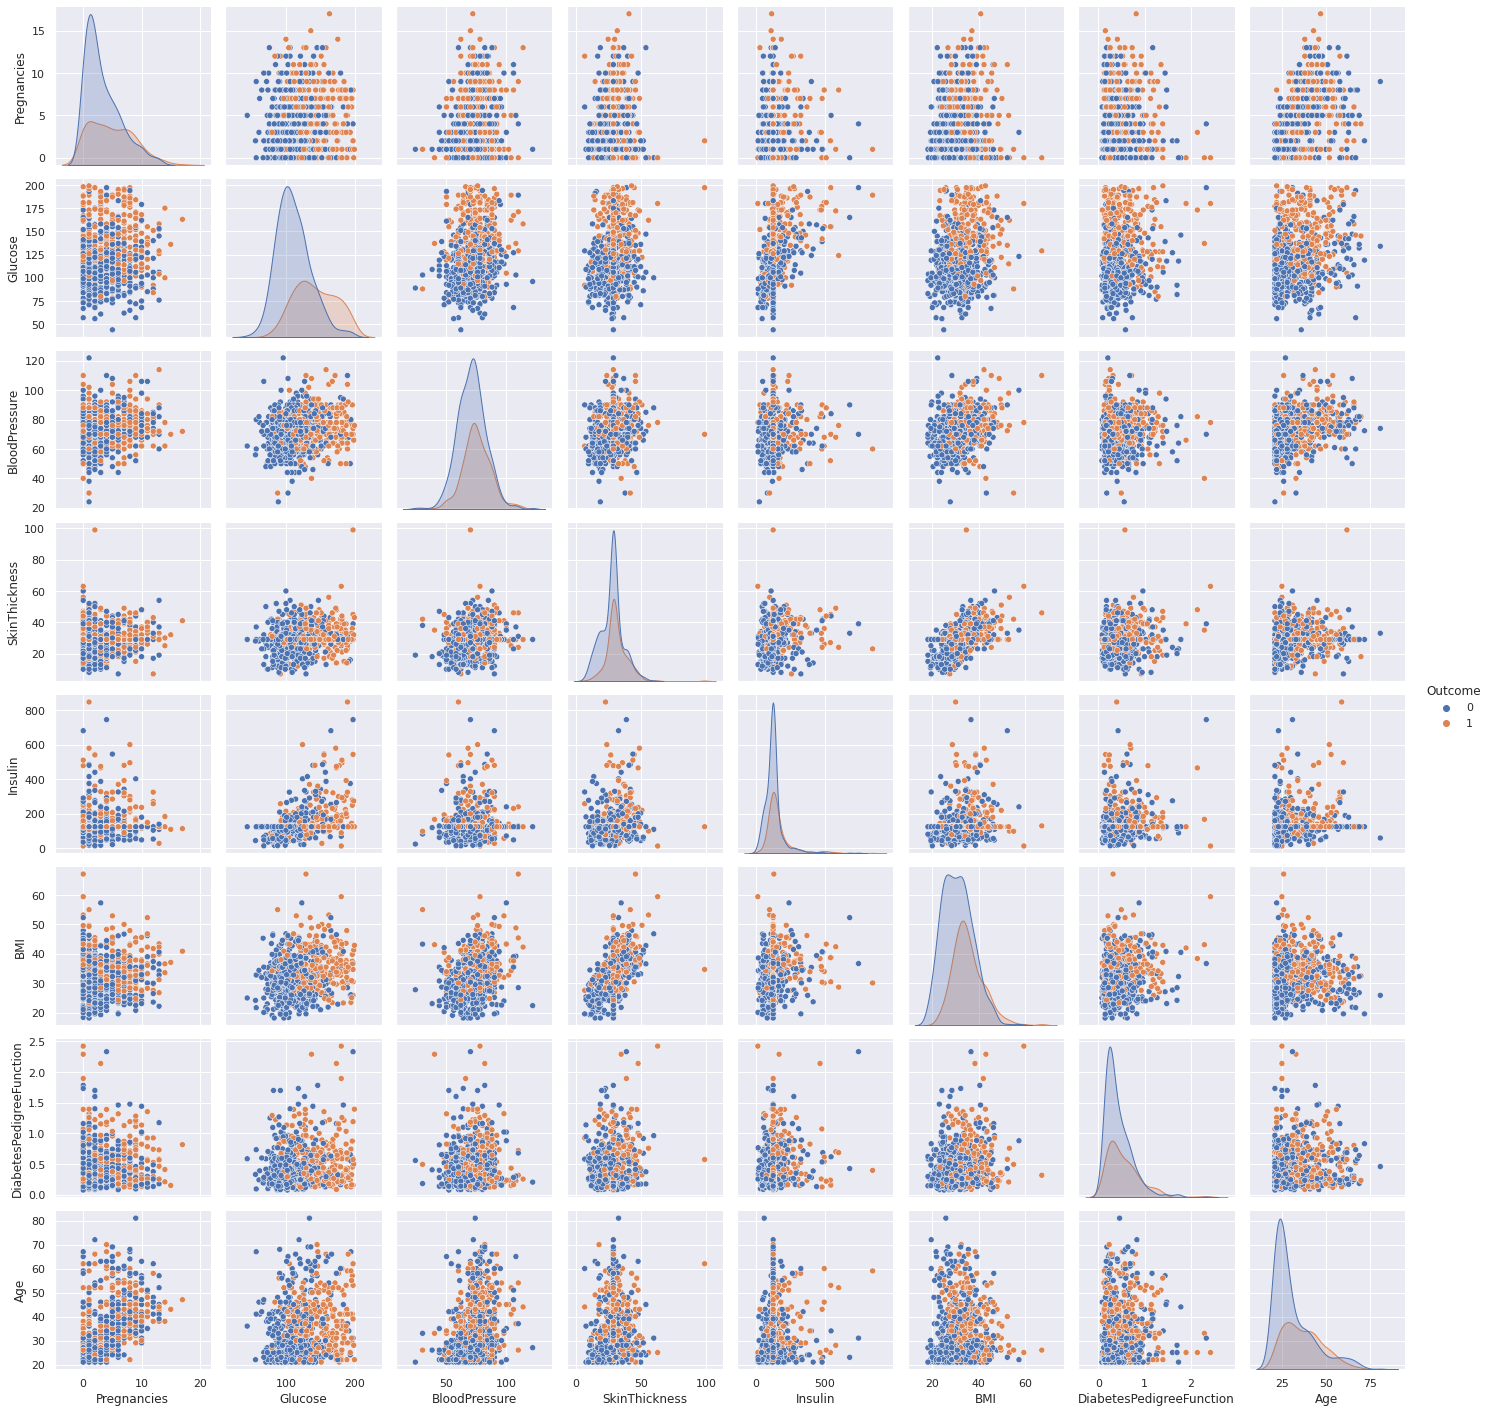

In [105]:
sns.pairplot(dfDiabetesCopy, hue = 'Outcome')

##**2.8 Mapa de calor:** Data set sin procesar (valores nulos)

Un mapa de calor es una representación bidimensional de información con la ayuda de colores. Los mapas de calor pueden ayudar al usuario a visualizar información simple o compleja.

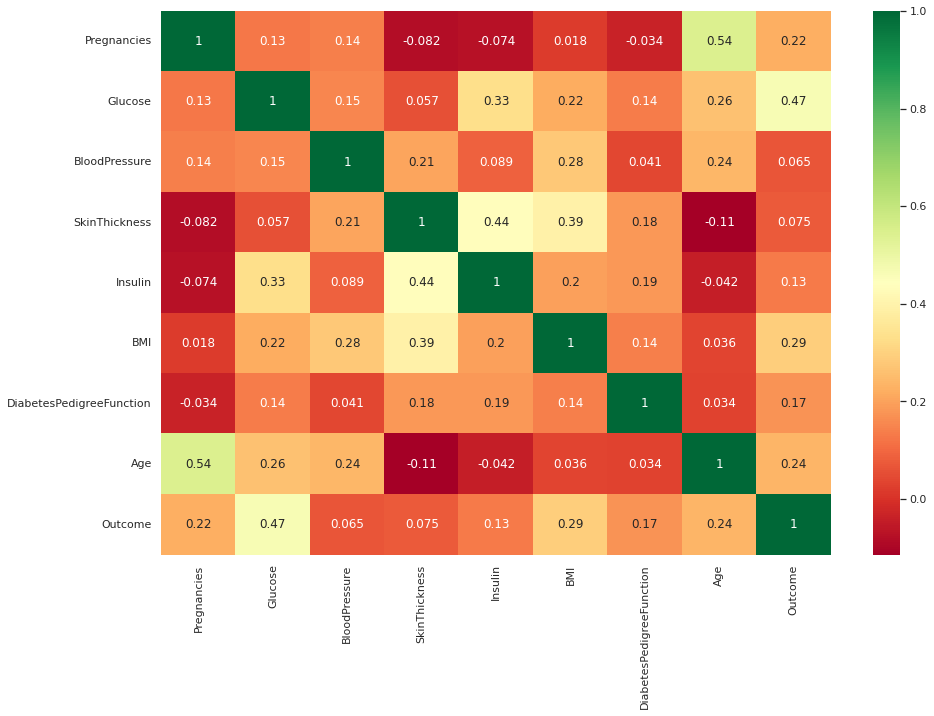

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(dfDiabetes.corr(), annot=True,cmap ='RdYlGn')

##**2.8 Mapa de calor:** Data set procesado (sin valores nulos)

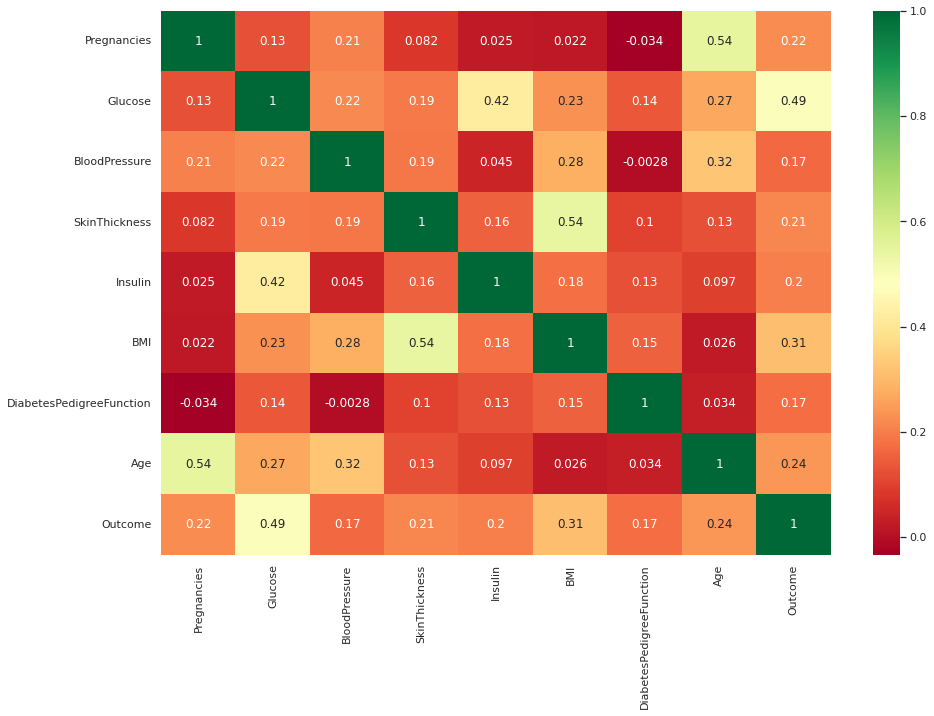

In [107]:
plt.figure(figsize=(15,10))
sns.heatmap(dfDiabetesCopy.corr(), annot=True,cmap ='RdYlGn')

In [108]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

##**3. Construccion del modelo:** Matriz de confusion (Teoria)

La matriz de confusión es una técnica utilizada para resumir el rendimiento de un algoritmo de clasificación, es decir, tiene salidas binarias.

A continuacion un ejemplo donde tenemos una cantidad de datos n = 165.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



**En el famoso ejemplo del cáncer:**


Los casos en los que el médico predijo SÍ (tienen la enfermedad) y tienen la enfermedad se denominarán VERDADEROS POSITIVOS (TP). El médico ha predicho correctamente que el paciente tiene la enfermedad.

Los casos en los que el médico predijo NO (no tienen la enfermedad) y no tienen la enfermedad se denominarán VERDADEROS NEGATIVOS (TN). El médico ha predicho correctamente que el paciente no tiene la enfermedad.

Los casos en los que el médico predijo SÍ y no tienen la enfermedad se denominarán FALSOS POSITIVOS (FP). También conocido como "error de tipo I".

Los casos en los que el médico predijo NO y tienen la enfermedad se denominarán FALSOS NEGATIVOS (FN). También conocido como "error de tipo II".


Referencia: [medium.com (Matriz de confusion)](https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327)

##**3.1 Importe de librerias:** sklearn

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Variable dependiente(Target)
y = dfDiabetesCopy['Outcome']

# Variables independientes (Features)
X = dfDiabetesCopy.drop(['Outcome'], axis = 1)

# Se divide en conjunto de entrenamiento y prueba
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3)

##**3.2 Creacion del modelo:**

A continuacion se crea el modelo instanceando el objeto Logistic regression.

In [110]:
modeloLR = LogisticRegression()

##**3.3 Entrenamiento del modelo:**
Se entrena el modelo para el conjunto de entrenamiento

In [111]:
modeloLR.fit(X_Train, y_Train)

LogisticRegression()

##**3.4 Predicciones:**
A continuacion se crea la variable predicciones, para hacer las predicciones con nuestro modelo de regresion logística

In [112]:
predicciones = modeloLR.predict(X_Test)

##**4. Resultados**
A continuacion usaremos parte de la teoria de regresion logistica para hacer un analisis de nuestro modelo y que tan precisas pueden llegar a ser nuestras predicciones.

##**4.1 Matriz de confusión:**

In [113]:
confusion_matrix(y_Test, predicciones)
pd.crosstab(y_Test, predicciones, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,134,16,150
1,45,36,81
All,179,52,231


##**4.2 Matriz de confusión:** Mapa de calor.

Text(0.5, 12.5, 'Predicciones')

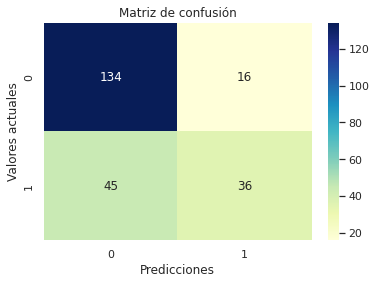

In [114]:
matrix = metrics.confusion_matrix(y_Test, predicciones)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Valores actuales')
plt.xlabel('Predicciones')

##**4.3 Reporte de calificaciones**

Informe que incluye Precision, Recall y F1-Score.
##**Conceptos:**     
        
**Precisión:** la precisión es la relación entre las observaciones positivas predichas correctamente y el total de observaciones positivas predichas. La pregunta que esta métrica responde es de todos los pasajeros etiquetados como sobrevivientes, ¿cuántos sobrevivieron realmente? La alta precisión se relaciona con la baja tasa de falsos positivos. Tenemos una precisión de 0,788 que es bastante buena.

* Precisión = TP / TP + FP

**Recall (Sensibilidad):** Recall es la proporción de observaciones positivas predichas correctamente para todas las observaciones en la clase real - sí. La pregunta para recordar las respuestas es: De todos los pasajeros que realmente sobrevivieron, ¿a cuántos etiquetamos? Un recuerdo superior a 0,5 es bueno.

* Recuperar = TP / TP + FN

**Puntuación F1:** La puntuación F1 es el promedio ponderado de Precisión y Recall. Por tanto, esta puntuación tiene en cuenta tanto los falsos positivos como los falsos negativos. Intuitivamente, no es tan fácil de entender como la precisión, pero F1 suele ser más útil que la precisión, especialmente si tiene una distribución de clases desigual. La precisión funciona mejor si los falsos positivos y los falsos negativos tienen un costo similar. Si el costo de los falsos positivos y los falsos negativos es muy diferente, es mejor mirar tanto Precision como Recall.

* Puntuación F1 = 2 * (Recall * Precisión) / (Recall + Precisión)

##**Puntuación de precisión:**

    TP: Verdaderos positivos
    FP: Falsos positivos

    Precisión: precisión de las predicciones positivas.
    Precisión = TP / (TP + FP)
        
   
##**Recall Score**
    FN: Falsos negativos

    Recall (Sensibilidad o tasa de verdaderos positivos): fracción de positivos que se identificaron correctamente.
    Recall = TP / (TP + FN)
        
##**Puntuación F1 (F1 Score)**
    F1 Score (también conocido como F-Score o F-Measure): una métrica útil para comparar dos clasificadores.
    F1 Score tiene en cuenta la precisión y la recuperación.
    Se crea al encontrar la media armónica de precisión y recuerdo.

    F1 = 2 x (precisión x recuperación) / (precisión + recuperación)
        
        
Referencia: [joshlawman.com (Metricas de clasificación)](http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/)

Referencia: [blog.exsilio.com (Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

##**4.4 Reporte de calificaciones:**

In [115]:
print(classification_report(y_Test, predicciones))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       150
           1       0.69      0.44      0.54        81

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



##**5. Conclusiones:**

De acuerdo a la teoría estudiada podemos concluir que nuestro modelo es bastante decente dado que nuestra puntuación F1 es más cercana a 1 en ambas métricas (Presicion y Recall), teniendo en cuenta que este calificador es la media ponderada entre las dos métricas que más nos importan para nuestro modelo. Sin embargo, esto depende mucho de que intentamos lograr con nuestro modelo, si deseamos saber de entre las personas que se etiquetaron como positivas cuantas en realidad padecen de diabetes, en este caso tendremos que ajustar un poco la Presicion, en nuestro modelo tenemos esta métrica en 0.68 la cual es decente, pero podría mejorarse. Por otro lado, también podemos preguntarnos ¿Entre las personas estudiadas de las cuales realmente padecen de diabetes a cuantas logramos identificar? en este caso deberemos ajustar un poco el Recall (Sensibilidad).


Referencias del notebook: [kaggle.com](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

Nota: Use cosas muy generales del Notebook adaptándolo y complementándolo a los conocimientos adoptados hasta ahora omitiendo los métodos de optimización entre otros.
